# CHURN PREDICTION MODEL 

Customer retention is one of the key component of subscription-based business models. Competition can be extremely tough in the markets where customers are free to choose from plenty of providers. Customer churn is as the percentage of customers that stopped using a company's product or service during a certain time frame: customer churn rate is the percentage of lost customers over the whole customer base at the beginning of the observational time frame. 

The first objective of a churn campaign consists in retaining customers at highest risk of churn by proactively engaging with them, e.g. offering a gift voucher or pricing reductions in order to lock them for an additional year or two, to extend their lifetime value to the company. 

There are two broad concept to consider in this case: 
- the model should predict in advance who is going to break the relationship with the service provider. For such a purpose, a cut-off date should be introduced: information after the cut-off date cannot be used as a feature in the ML model (useful information is called 'Event' in this Python notebook); 
- there's the need of a target column, i.e. the customer is going to leave the company in the next quarter (1 for Yes, 0 for No). In this Python notebook, the target column is called 'Performance Window'.

#### CUSTOMER CHURN MODEL WORKFLOW

- A model is trained on customer churn history; 
- Every month active customer base is passed to the ML model to return a 'score of churn'; 
- The list is sorted from highest to lowest in order to identify those who are more likely to leave the company.

## 1. IMPORTING THE DATASET

In [1]:
# import libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In what follows, we give the details of the dataset columns: 
- SeniorCitizen: if the customer is a senior citizen or not (1 or 0); 
- Partner: if the customer has a partner or not (Yes or No); 
- Dependents: if the customer has dependents or not (Yes or No); 
- Tenure: number of months the customer has stayed with the company; 
- PhoneService: whether the customer has a phone service or not (Yes or No); 
- MultipleLines: whether the customer has multiple lines or not (Yes or No); 
- InternetService: customer's internet service provider (DSL, OF, No);
- OnlineSecurity: whether the customer has online security or not (Yes, No, No internet service); 
- OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service); 
- DeviceProtection: whether the customer has device protection or not (Yes, No, No internet service); 
- TechSupport: whether the customer has tech support of not (Yes, No, No internet service); 
- StreamingTV: whether the customer has streaming TV or not (Yes, No, No internet service); 
- StreamingMovies: whether the customer has streaming movies or not (Yes, No, No internet service); 
- Contract: the contract term of the customer (month-to-month, one year, two years); 
- PaperlessBilling: whether the customer has paperless billing or not (Yes, No); 
- PaymentMethod: the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic));
- MonthlyCharges: the amount charged to the customer monthly; 
- TotalCharges: the total amount charged to the customer; 
- Churn: whether the customer churned or not (Yes or No);

## 2. EXPLORATORY DATA ANALYSIS

In [3]:
def find_correct_white_spaces(pd_column):
    kk = 0;             # index for the while loop 
    white_values = [];  # empty list to be filled with the index rows containing white values
    
    while kk < len(pd_column):
        if pd_column[kk] == ' ':
            white_values.append(kk)
        kk += 1
        
    print('Single white spaces in lines:', white_values)
    print(' ')

    M = input('Do you want to fill them with NaN values? [Y/N] >> ')
    for kk in white_values: 
        pd_column[kk] = np.nan; 
        
def from_object_to_float_column(pd_column): 
    return pd_column.astype('float64')

In [4]:
# data exploration 
data.shape            # (7043 rows, 21 columns)
print('The dataset has %i rows and %i columns.' %(data.shape[0], data.shape[1]))

data.dtypes

The dataset has 7043 rows and 21 columns.


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# GENDER 
num_gender = data['gender'].value_counts();
print('The number of men is %i, while the number of women is %i.' %(num_gender[0], num_gender[1]))
print('Men [%]:', round(num_gender[0]/data.shape[0],3))
print('Women [%]:', round(num_gender[1]/data.shape[0],3))
print(' ')

# SENIOR CITIZEN 
num_senior_citizen = data['SeniorCitizen'].value_counts();
print('The number of senior citizens is %i, while young ones are %i.' %(num_senior_citizen[1], num_senior_citizen[0]))
print('Senior citizens [%]:', round(num_senior_citizen[1]/data.shape[0],3))
print('Young citizens [%]:', round(num_senior_citizen[0]/data.shape[0],3))

The number of men is 3555, while the number of women is 3488.
Men [%]: 0.505
Women [%]: 0.495
 
The number of senior citizens is 1142, while young ones are 5901.
Senior citizens [%]: 0.162
Young citizens [%]: 0.838


The mean tenure for the considered customer base is 32.37 months, i.e. 2.70 years.
The greater tenure observed within the dataset is 72 months, i.e. 6.00 years


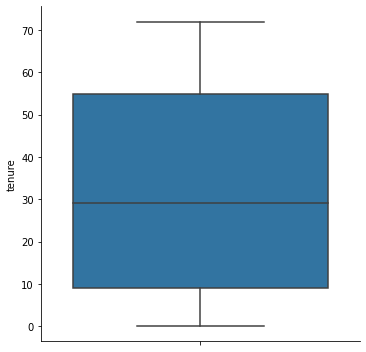

In [6]:
# TENURE, i.e. number of months the customer has stayed with the company 
print('The mean tenure for the considered customer base is %.2f months, i.e. %.2f years.' %(data['tenure'].mean(), data['tenure'].mean()/12))
print('The greater tenure observed within the dataset is %i months, i.e. %.2f years' %(data['tenure'].max(), data['tenure'].max()/12))

sns.catplot(y='tenure', kind='box', data=data) # here data = the name of the dataset

In [7]:
# TELCO PROFILES
print('The number of customers with Phone Service is %i, with percentage %.2f %%.' %(data['PhoneService'].value_counts()[0], \
                                                                                    data['PhoneService'].value_counts()[0]/data.shape[0])) # YES
print('The number of customers with Multiple Lines is %i, with percentage %.2f %%.' %(data['MultipleLines'].value_counts()[0], \
                                                                                    data['MultipleLines'].value_counts()[0]/data.shape[0])) # YES
print(' ')

# Customers with Fiber Optic
print('The number of customer with OF is %i, with percentage %.2f %%.' %(data['InternetService'].value_counts()[0], data['InternetService'].value_counts()[0]/data.shape[0]))
# Customers with DSL
print('The number of customer with DSL is %i, with percentage %.2f %%.' %(data['InternetService'].value_counts()[1], data['InternetService'].value_counts()[1]/data.shape[0]))
# Customers with DSL
print('The number of customer without the internet service is %i, with percentage %.2f %%.' %(data['InternetService'].value_counts()[2], \
                                                                                              data['InternetService'].value_counts()[2]/data.shape[0]))

The number of customers with Phone Service is 6361, with percentage 0.90 %.
The number of customers with Multiple Lines is 3390, with percentage 0.48 %.
 
The number of customer with OF is 3096, with percentage 0.44 %.
The number of customer with DSL is 2421, with percentage 0.34 %.
The number of customer without the internet service is 1526, with percentage 0.22 %.


The monthly charges average is 64.76 $


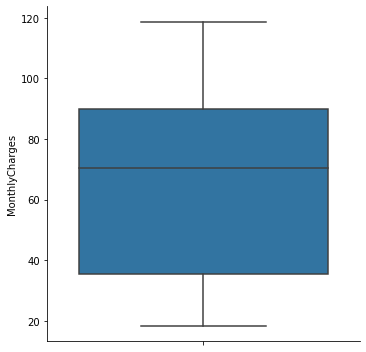

In [8]:
# MONTHLY CHARGES 
print('The monthly charges average is %.2f $' %data['MonthlyCharges'].mean())

sns.catplot(y='MonthlyCharges', kind='box', data=data) # here data = the name of the dataset

In [9]:
# TOTAL CHARGES - it should be float64 and not an object column

# Look for white spaces
find_correct_white_spaces(data['TotalCharges'])

Single white spaces in lines: [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
 


Do you want to fill them with NaN values? [Y/N] >>  Y


<ipython-input-3-8848e2d6bab7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_column[kk] = np.nan;


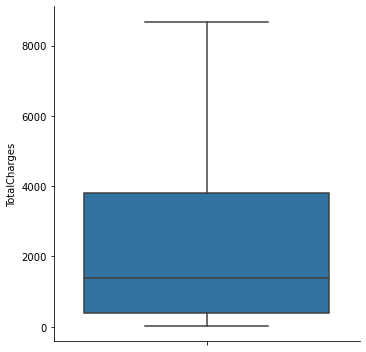

In [13]:
# From Object to Float Column 
data['TotalCharges'] = from_object_to_float_column(data['TotalCharges'])

# BoxPlot of the TotalCharges
sns.catplot(y='TotalCharges', kind='box', data=data) # here data = the name of the dataset

In what follows, we explore who is the churning customer with respect to some variables of the dataset.

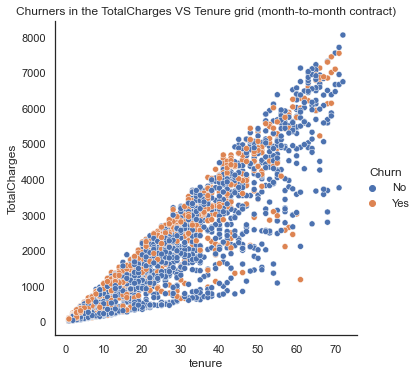

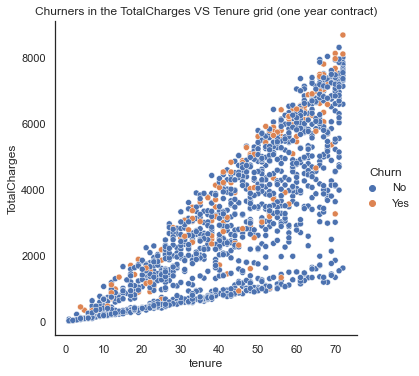

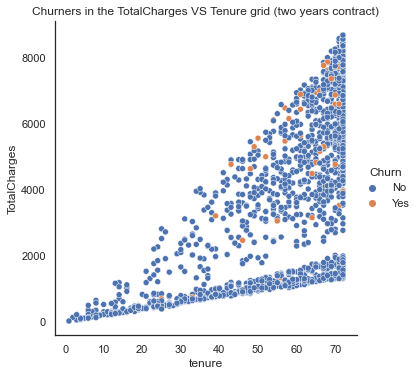

In [55]:
sns.set_theme(style="white")

# RELPLOT of the churners in the TotalCharges VS Tenure grid (with month-to-month contract)
sns.relplot(x='tenure', y='TotalCharges', hue='Churn', data=data[data['Contract'] == 'Month-to-month']).set(title='Churners in the TotalCharges VS Tenure grid \
(month-to-month contract)')

# RELPLOT of the churners in the TotalCharges VS Tenure grid (with one year contract)
sns.relplot(x='tenure', y='TotalCharges', hue='Churn', data=data[data['Contract'] == 'One year']).set(title='Churners in the TotalCharges VS Tenure grid \
(one year contract)')

# RELPLOT of the churners in the TotalCharges VS Tenure grid (with two years contract)
sns.relplot(x='tenure', y='TotalCharges', hue='Churn', data=data[data['Contract'] == 'Two year']).set(title='Churners in the TotalCharges VS Tenure grid \
(two years contract)')

## 3. DATA PREPARATION 

In what follows, we will use PyCaret which is a deployment ready Python library. Before we begin any ML routine in PyCaret, we must necessarily set the environment.

STEP #1

IMPORTING A MODULE - Importing a module prepares an environment for a specific task, i.e. if you have imported the Classification module, the environment will be setup accordingly to perform classification tasks only;
- Module: Classification, How to import: from pycaret.classification import *
- Module: Regression, How to import: from pycaret.regression import *
- Module: Clustering, How to import: from pycaret.clustering import *
- Module: Anomaly Detection, How to import: from pycaret.anomaly import *
- Module: Natural Language Processing, How to import: from pycaret.nlp import *
- Module: Association Rule Mining, How to import: from pycaret.arules import *

STEP #2

Common to all modules in PyCaret, setup is the first and the only mandatory step to start any ML experiment. Once the setup is executed, a dialogue box appears with the list of all features and their inferred data types. Data type inferences are usually correct but once the dialogue box appears, user should always review the list for accuracy. If all the data types are inferred correctly, user can press enter to continue or if not he/she can 'quit' to stop the experiment.

In [57]:
# Initialization setup 

# STEP 1: importing the classification module
from pycaret.classification import * 

# STEP 2: performing the setup 
s = setup(data, target = 'Churn', ignore_features = ['customerID'])  # 'customerID' is passed within the setup function so that it is not considered when traning the models.

,Description,Value
0,session_id,5102
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


## 4. COMPARE MODELS 

This is the first step recommended in the workflow of any supervised learning experiment. This function trains all the models in the 'model library' using default hyperparameters and evaluates performance metrics using cross-validation. It returns the trained model object. 

The evaluation metrics used are: 
- Classification: Accuracy, AUC, Recall, Precision, F1, Kappa, MCC (Matthews correlation coefficient) 
- Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

The output of the function is a table showing the averaged score of all models across the folds. The number of folds can be defined using the 'fold' parameter within the compare_models function. By default, the 'fold' parameter is set to 10. By default, the table is sorted by 'Accuracy' for classification experiments and 'R2' for regression experiments. 

In [58]:
# Return the best model 
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8026,0.8441,0.5395,0.6663,0.5952,0.4669,0.4720,0.1960
lr,Logistic Regression,0.8020,0.8435,0.5553,0.6587,0.6016,0.4714,0.4750,0.9820
ada,Ada Boost Classifier,0.8002,0.8434,0.5478,0.6560,0.5957,0.4648,0.4689,0.0740
lda,Linear Discriminant Analysis,0.7966,0.8366,0.5605,0.6413,0.5971,0.4621,0.4646,0.0280
ridge,Ridge Classifier,0.7963,0.0000,0.5222,0.6543,0.5800,0.4480,0.4535,0.0360
lightgbm,Light Gradient Boosting Machine,0.7923,0.8308,0.5320,0.6378,0.5790,0.4430,0.4468,0.2710
rf,Random Forest Classifier,0.7822,0.8153,0.4884,0.6227,0.5466,0.4063,0.4119,0.1590
xgboost,Extreme Gradient Boosting,0.7795,0.8193,0.5170,0.6073,0.5579,0.4125,0.4152,0.5740
et,Extra Trees Classifier,0.7675,0.7878,0.4816,0.5850,0.5270,0.3752,0.3790,0.1890
knn,K Neighbors Classifier,0.7629,0.7397,0.4493,0.5803,0.5052,0.3529,0.3585,0.0280


In [60]:
# print best_model parameters
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5102, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## 5. HYPERPARAMETER TUNING 

It is possible to use the 'tune_model' function from PyCaret to automatically tune the hyperparameters of the model. 

In [61]:
# tune best_model 
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7890,0.8169,0.5489,0.6239,0.5840,0.4435,0.4451
1,0.8398,0.8893,0.6316,0.7368,0.6802,0.5741,0.5771
2,0.8154,0.8495,0.5639,0.6944,0.6224,0.5020,0.5068
3,0.7972,0.8395,0.5188,0.6571,0.5798,0.4486,0.4540
4,0.7951,0.8395,0.4586,0.6778,0.5471,0.4210,0.4344
5,0.8154,0.8546,0.5489,0.7019,0.6160,0.4969,0.5034
6,0.8195,0.8736,0.6015,0.6897,0.6426,0.5226,0.5247
7,0.7890,0.8342,0.4887,0.6436,0.5556,0.4206,0.4275
8,0.8093,0.8502,0.5865,0.6667,0.6240,0.4970,0.4988
9,0.7850,0.8370,0.4403,0.6556,0.5268,0.3945,0.4076


## 6. MODEL ANALYSIS 

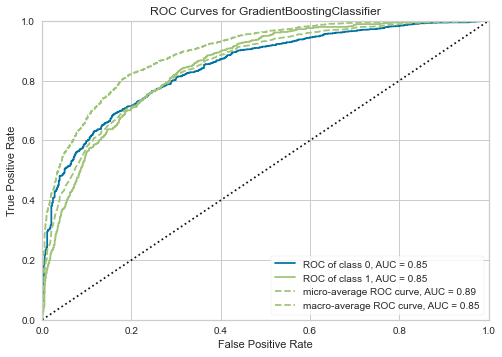

In [62]:
# AUC Plot
plot_model(tuned_best, plot = 'auc')

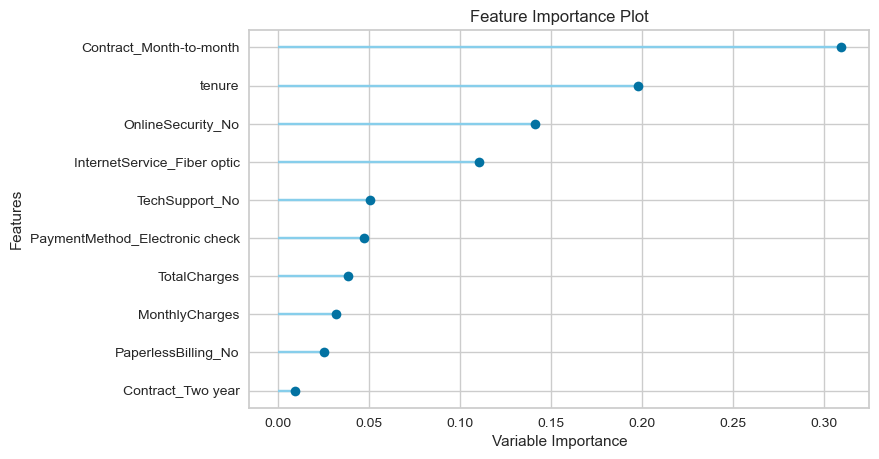

In [64]:
# Feature Importance Plot
plot_model(tuned_best, plot = 'feature')

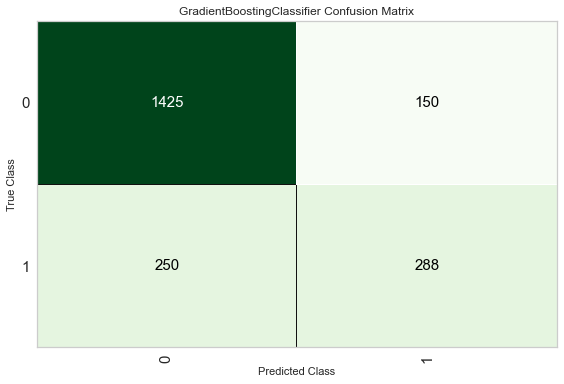

In [66]:
# Confusion Matrix
plot_model(tuned_best, plot = 'confusion_matrix')